In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from IPython.display import IFrame

IFrame('Boyce_12e_PPT_ch02_1.pdf', width=1000, height=700)

In [33]:
%matplotlib widget


import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from pathlib import Path
from PIL import Image      
import tempfile, shutil
import subprocess, sys, os

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


def general_solution(t, c):
    t = np.asarray(t, dtype=float)
    if np.any(t == 0.0):
        raise ValueError("t must be non-zero")
    return t**2 + c / t**2


def particular_solution(t, y1):
    c = y1 - 1.0
    return general_solution(t, c)


def get_figure(tmin=0.1, tmax=3.0, y0_default=2.0):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlabel("t")
    ax.set_ylabel("y")
    ax.set_title("y' + 2y/t = 4t")

    T, Y = np.meshgrid(np.linspace(tmin, tmax, 25),
                       np.linspace(-1, 10, 25))
    dT = np.ones_like(T)
    dY = 4 * T - 2 * Y / T
    L = np.hypot(dT, dY)
    ax.quiver(T, Y, dT / L, dY / L, alpha=0.4, color="gray")

    line, = ax.plot([], [], lw=2, color="C3")

    @interact(y0=FloatSlider(min=-2, max=6, step=0.1,
                             value=y0_default, description="y(1)="))
    def _update(y0):
        t = np.linspace(tmin, tmax, 400)
        y = particular_solution(t, y0)
        line.set_data(t, y)
        ax.set_xlim(tmin, tmax)
        ax.set_ylim(np.nanmin(y), np.nanmax(y))
        fig.canvas.draw_idle()

    return fig


interactive(children=(FloatSlider(value=2.0, description='y(1)=', max=6.0, min=-2.0), Output()), _dom_classes=…

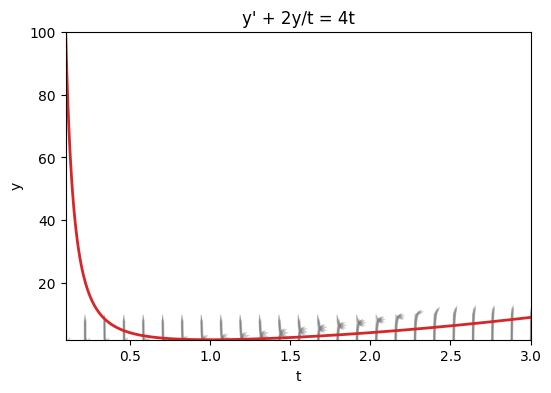

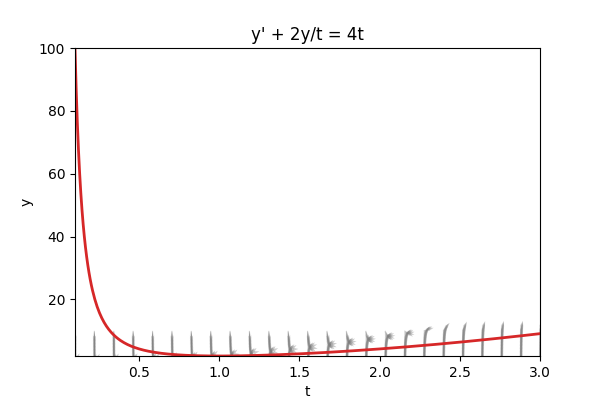

In [34]:
get_figure()